In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from skgarden import RandomForestQuantileRegressor
from sklearn.ensemble import RandomForestRegressor

### Load custom python function

In [2]:
import sys
sys.path.append('/home2/miranov/github/RootInteractive/QuantileRegression/distortionCase/')
from distortionStudy import *

##  Load data and the necessary estimators. 
#### Note that min_samples_split is set to 10 and the cross-validation is 5-split.
####  Parameters:
* KFold:
  * n_pslits=5
* Random forst:
  * n_estimators = 1000
  * random_state = 0
  * n_jobs = -1 

In [114]:
input="NOTESData/JIRA/ATO-336/distortionAll.csv"
df1=loadCSVTreePanda(input)
print("load csv file", input, df1.shape)
kf = KFold(n_splits=5, random_state=0)
# quantile random forest
rfqr = RandomForestQuantileRegressor(random_state=0, min_samples_split=5, n_estimators=1000,n_jobs=-1)
# standart random forest
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)

('load csv file', '/home/miranov/NOTESData/distortionAll.csv', (100000, 70))


In [ ]:
df1.head()

In [ ]:
df1.columns

In [95]:
selected=df1.query('sector==2 & isIROC').sample(500)
y=(selected['trdMeanMedianL0']).values
X=selected[['trdMeanMedianL1','trdMeanMedianL2','trdMeanMedianL3','trdMeanMedianL4','trdMeanMedianL5','bz','bsign']].values

In [35]:
X.shape

(500, 7)

In [115]:
y_true_all = []
lower = []
upper = []
median =[]
fit=[]

for train_index, test_index in kf.split(X):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test= (
        X[train_index], X[test_index], y[train_index], y[test_index])

    rfqr.set_params(max_features=X_train.shape[1] )
    rfqr.fit(X_train, y_train)
    rf.set_params(max_features=X_train.shape[1])
    rf.fit(X_train, y_train)
    upper = np.concatenate((upper, rfqr.predict(X_test,quantile=90.)))
    lower = np.concatenate((lower, rfqr.predict(X_test, quantile=10.)))
    median =np.concatenate((median, rfqr.predict(X_test, quantile=50.)))
    fit=np.concatenate((fit, rf.predict(X_test)))
    y_true_all = np.concatenate((y_true_all, y_test))
 

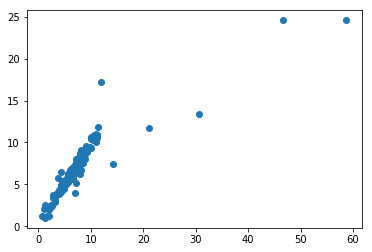

In [108]:
dy_true_all=y_true_all-fit
#plt.scatter(median,fit)
#plt.scatter(lower,fit)
#plt.scatter(upper,fit)
plt.scatter(y_true_all,median)

([array([  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           1.,   1.,   2.,   0.,   2.,   1.,   3.,   3.,   6.,   3.,  13.,
          19.,  56., 130., 148.,  61.,  19.,  10.,   3.,   4.,   0.,   1.,
           3.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
           0.,   0.,   1.,   0.,   1.,   0.,   3.,   3.,   4.,   9.,   9.,
          27.,  48., 130., 139.,  61.,  23.,  13.,   5.,   3.,   4.,   5.,
           0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.])],
 array([-3.  , -2.88, -2.76, -2.64, -2.52, -2.4 , -2.28, -2.16, -2.04,
        -1.92, -1.8 , -1.68, -1.56, -1.44, -1.32, -1.2 , -1.08, -0.96,
        -0.84, -0.72, -0.6 , -0.48, -0.36, -0.24, -0.12,  0.  ,  0.12,
         0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,  1.08,  1.2 ,
         1.32,  1.44,

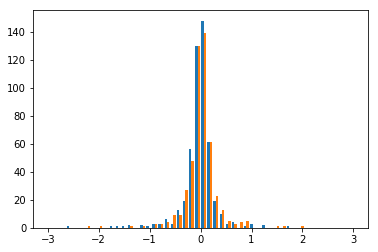

In [133]:
delta=[y_true_all-fit,y_true_all-median]
plt.hist(delta,bins=50, label="Z",range=[-3, 3],stacked=0)

In [18]:
interval = upper - lower
sort_ind = np.argsort(interval)
y_true_all = y_true_all[sort_ind]
upper = upper[sort_ind]
lower = lower[sort_ind]
median=median[sort_ind]
fit=fit[sort_ind]
mean = (upper + lower) / 2
# Center such that the mean of the prediction interval is at 0.0
dy_true_all=y_true_all
dy_true_all -= mean
upper -= mean
lower -= mean

In [12]:
#print(rfqr.predict(X_test, quantile=98.5))

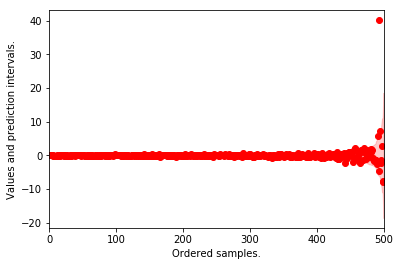

In [20]:
plt.plot(dy_true_all, "ro")
plt.fill_between(
    np.arange(len(upper)), lower, upper, alpha=0.2, color="r",
    label="Pred. interval")
plt.xlabel("Ordered samples.")
plt.ylabel("Values and prediction intervals.")
plt.xlim([0, 500])
plt.show()

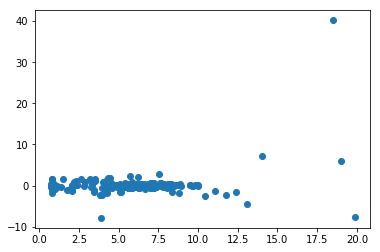

In [24]:
plt.scatter(median,y_true_all)

In [ ]:
X.shape

In [ ]:
X_train.shape[1] // 3

In [ ]:
plt.scatter(selected['trdMeanMedianL0'], selected['trdMeanMedianL1'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)